***
# Wind Turbine Linear Regression.
***

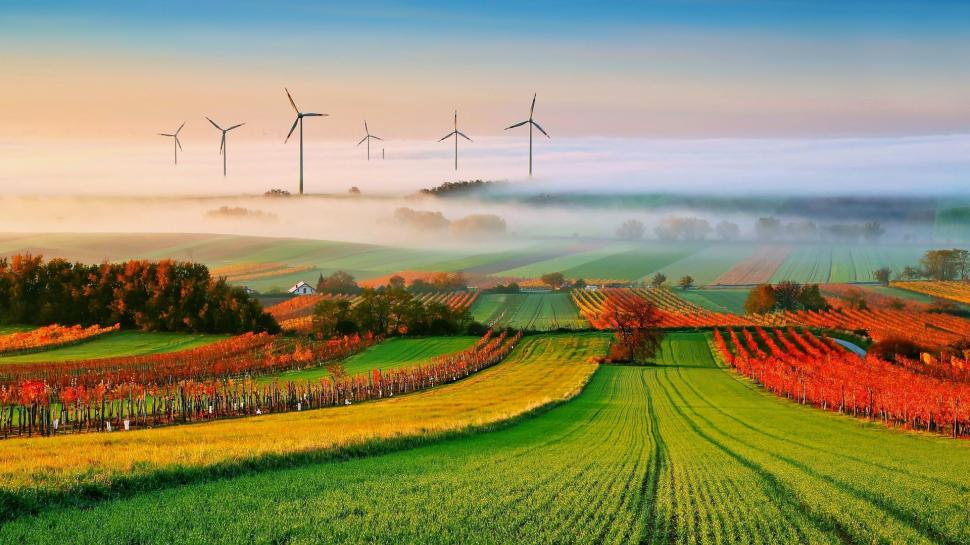

***
### Aim:
***

An investigation into various forms of linear regression applied to power curves of wind turbines in the hope of achieving the best possible fit to the data given.

##### Imports & Preferences:

In [2]:
# Numerical array and fitting lines:
import numpy as np

#plots:
import matplotlib.pyplot as plt

In [4]:
# Nicer plot style:
plt.style.use('ggplot')

# Bigger plots:
plt.rcParams['figure.figsize'] = (18,10)